# 1. Interpoliavimas daugianariu
| **Var. Nr** | **Funkcijos išraiška** | **Bazinė funkcija** |
|---|---|---|
| 1 | $e^{-x^{2}} * sin(x^2) * (x-3); -3 \leq x \leq 2$ | Čiobyševo |

1.9922933343328197
1.9309248009941915
1.809698831278217
1.631600410885231
1.4010149140000774
1.1236201208254595
0.8062464117898722
0.4567085809127246
0.08361340963976371
-0.3038522606803875
-0.6961477393196122
-1.0836134096397634
-1.4567085809127243
-1.806246411789872
-2.123620120825459
-2.4010149140000774
-2.6316004108852304
-2.809698831278217
-2.9309248009941915
-2.9922933343328197
X, Y:
[ 1.99229333  1.9309248   1.80969883  1.63160041  1.40101491  1.12362012
  0.80624641  0.45670858  0.08361341 -0.30385226 -0.69614774 -1.08361341
 -1.45670858 -1.80624641 -2.12362012 -2.40101491 -2.63160041 -2.80969883
 -2.9309248  -2.99229333]
[ 1.40150510e-02  1.42258695e-02  5.98771070e-03 -4.40618961e-02
 -2.07551205e-01 -5.05874546e-01 -6.93090830e-01 -4.27498345e-01
 -2.02468368e-02 -2.77735652e-01 -1.06059343e+00 -1.16413110e+00
 -4.54807241e-01  2.22022137e-02  5.52121650e-02  8.39058602e-03
 -3.31407676e-03 -2.16421810e-03 -8.16906572e-04 -3.51403793e-04]
[[ 1.00000000e+00  1.99229333e+00  3

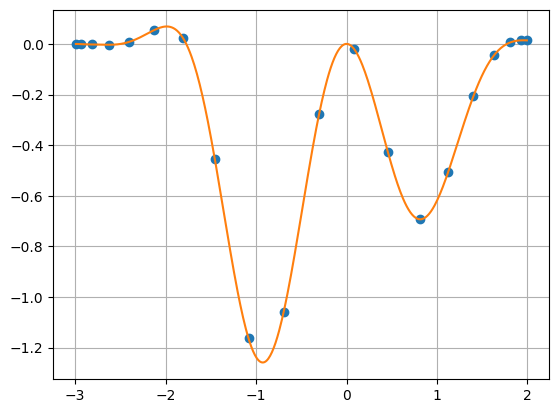

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def function(x):
    return np.exp(-x**2) * np.sin(x**2)*(x-3)

def base(x, num):
    return np.power(x, num)

xMin = -3
xMax = 2

# Tolygiai pasiskirstę taškai
X = np.arange(xMin, xMax, 1)
X = np.append(X, xMax)

# Čiobyševo abscisės
n = 20 # Taškų kiekis

X = np.linspace(-1, 1, n)

# Apskaičiuojame Čiobyševo abscises
for i in range(n):
    X[i] = np.cos((np.pi * (2*i + 1)) / (2*n))
    X[i] = (xMax + xMin) / 2 + ((xMax - xMin) / 2) * X[i]
    print(X[i])

# Apskaičiuojame ordinatės reikšmes Y gavimui
n = len(X)
Y = np.zeros(n)
for i in range(n):
    Y[i] = function(X[i])

print(f"X, Y:\n{X}\n{Y}")

# Skaičiuojame vienanarių metodu

n = len(X)

plt.figure(1)
plt.grid()
plt.plot(X, Y, 'o')

A = np.zeros((n,n), dtype=float)
for i in range(0, n):
    A[:,i] = base(X, i)

print(A)
a = np.linalg.solve(A, Y)
print(f"(Pradinių taškų reikšmės): A: {a}")

dots = 500
xx = np.linspace(X[0], X[n-1], dots)
yy = np.zeros(dots, dtype=float)

# Interpoliacija daugianariais
for i in range(0, n):
    yy += a[i] * base(xx, i)

plt.plot(xx, yy)
plt.show()

# 2. Interpoliavimas splainu per duotus taškus
| **Var. Nr** | **Šalis** | **Splainas** |
|---|---|---|
| 1 | Argentina | Globalus |

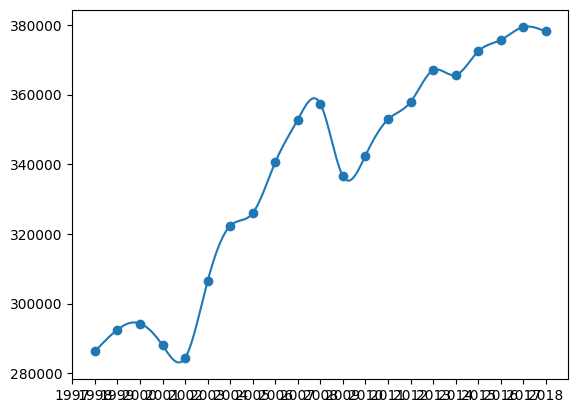

In [15]:
from pylab import *
import numpy as np

# Argentinos šiltnamio dujų emisijos duomenys
x = np.array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=np.float64)
y = np.array([286322.0268, 292407.6634, 294271.3913, 288040.6186, 284403.3884, 306433.5855, 322315.2629, 325978.7317, 340578.7653, 352851.0732, 357380.4391, 336630.902, 342496.5143, 352870.3484, 357872.7655, 366978.6016, 365636.2677, 372415.2067, 375694.4541, 379420.2746, 378187.3624], dtype=np.float64)


def cubic_spline(x0, x, y):
    # Convert to float to ensure numeric format
    x = np.asfarray(x)
    y = np.asfarray(y)

    size = len(x)
    xdiff = np.diff(x)
    ydiff = np.diff(y)

    Li = np.empty(size)
    Li_1 = np.empty(size - 1)
    z = np.empty(size)

    # Calculate coefficients for the tridiagonal system
    Li[0] = sqrt(2 * xdiff[0])
    Li_1[0] = 0.0
    B0 = 0.0
    z[0] = B0 / Li[0]

    for i in range(1, size - 1):
        Li_1[i] = xdiff[i - 1] / Li[i - 1]
        Li[i] = sqrt(2 * (xdiff[i - 1] + xdiff[i]) - Li_1[i - 1] * Li_1[i - 1])
        Bi = 6 * (ydiff[i] / xdiff[i] - ydiff[i - 1] / xdiff[i - 1])
        z[i] = (Bi - Li_1[i - 1] * z[i - 1]) / Li[i]

    i = size - 1
    Li_1[i - 1] = xdiff[-1] / Li[i - 1]
    Li[i] = sqrt(2 * xdiff[-1] - Li_1[i - 1] * Li_1[i - 1])
    z[i] = z[i] / Li[i]

    # Back-substitution to find the spline coefficients
    for i in range(size - 2, -1, -1):
        z[i] = (z[i] - Li_1[i - 1] * z[i + 1]) / Li[i]

    # Find the index for interpolation
    index = x.searchsorted(x0)
    np.clip(index, 1, size - 1, index)

    # Values needed for interpolation
    xi1, xi0 = x[index], x[index - 1]
    yi1, yi0 = y[index], y[index - 1]
    zi1, zi0 = z[index], z[index - 1]
    hi1 = xi1 - xi0  # Step size between adjacent points

    # Evaluate cubic spline at the specified point x0
    f0 = zi0 / (6 * hi1) * (xi1 - x0) ** 3 + \
         zi1 / (6 * hi1) * (x0 - xi0) ** 3 + \
         (yi1 / hi1 - zi1 * hi1 / 6) * (x0 - xi0) + \
         (yi0 / hi1 - zi0 * hi1 / 6) * (xi1 - x0)
    return f0

# Scatter plot of the original data
plt.scatter(x, y)

# Generate a fine mesh for the cubic spline plot
x_new = np.linspace(1998, 2018, 500)

# Plot the cubic spline interpolation using the provided function
plt.plot(x_new, cubic_spline(x_new, x, y))

# Set x-axis ticks to match the years in the data
plt.xticks(range(1997, 2019))

# Show the plot
plt.show()


# 3. Aproksimavimas
| **Var. Nr** | **Šalis** | **Splainas** |
|---|---|---|
| 1 | Argentina | Globalus |

f(x) = 6.2e+10 -4.6e+07x^1 -2.5e+04x^2 +   28x^3 -0.0059x^4
c:
[ 6.22893237e+10 -4.56194021e+07 -2.46681092e+04  2.77369814e+01
 -5.89210257e-03]


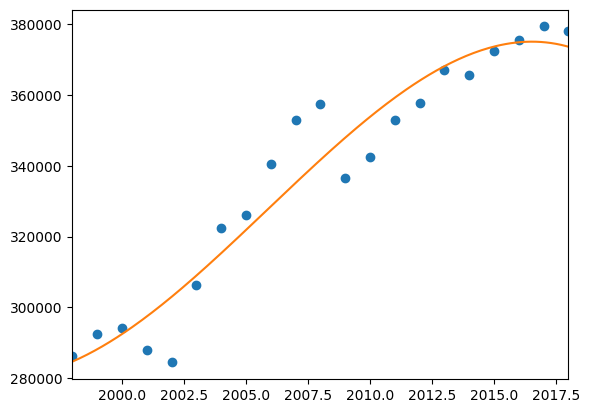

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def base(m, x):
    # Initialize an empty matrix Gv
    Gv = np.empty((len(x), m))

    # Fill the matrix Gv with elements of x raised to consecutive powers
    for i in range(1, m + 1):
        Gv[:, i - 1] = np.power(x, i - 1)

    return Gv


# Argentinos šiltnamio dujų emisijos duomenys
X = np.array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=np.float64)
Y = np.array([286322.0268, 292407.6634, 294271.3913, 288040.6186, 284403.3884, 306433.5855, 322315.2629, 325978.7317, 340578.7653, 352851.0732, 357380.4391, 336630.902, 342496.5143, 352870.3484, 357872.7655, 366978.6016, 365636.2677, 372415.2067, 375694.4541, 379420.2746, 378187.3624], dtype=np.float64)
xmin = 1998
xmax = 2018

m = 5 # Kelinta eile

plt.plot(X, Y, 'o')
G = base(m, X)

cLeftSide = G.transpose().dot(G)
cRightSide = G.transpose().dot(Y)
c = np.linalg.solve(cLeftSide, cRightSide).transpose()

s = f"{c[0]:5.2g}"
for i in range(1, m):
    s += f" +{c[i]:5.2g}x^{i}"
s = s.replace("+-", "-")
print(f"f(x) = {s}")

print(f"c:\n{c}")

points = 200
xx = np.linspace(xmin, xmax, points)
Gv = base(m, xx)
ff = Gv.dot(c)

plt.plot(xx, ff)
plt.xlim(1998, 2018)
plt.show()

# 4. Parametrinis aproksimavimas
| **Var. Nr** | **Šalis** | **Splainas** |
|---|---|---|
| 1 | Argentina | Globalus |

id: 5
Argentina
8
Initial Data Graph
Number of points read: 4270


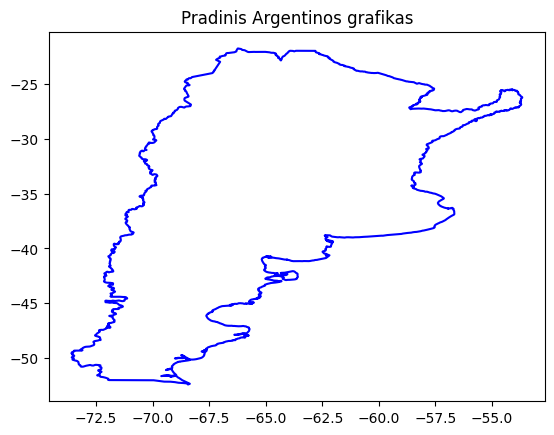

[0.00000000e+00 1.06430316e-01 1.17335090e-01 ... 1.34731919e+02
 1.34800831e+02 1.34907245e+02]
Haar Wavelet Ranges: [0.0 - 134.9072446469616]


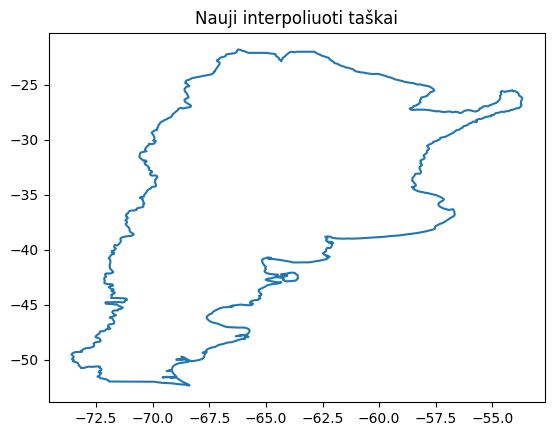

hx length:
1024
hx:
[ 4.83401906  4.83401906  4.83401906 ... -4.83401906 -4.83401906
 -4.83401906]
hy length:
1024
hy:
[ 4.99086343  4.99086343  4.99086343 ... -4.99086343 -4.99086343
 -4.99086343]


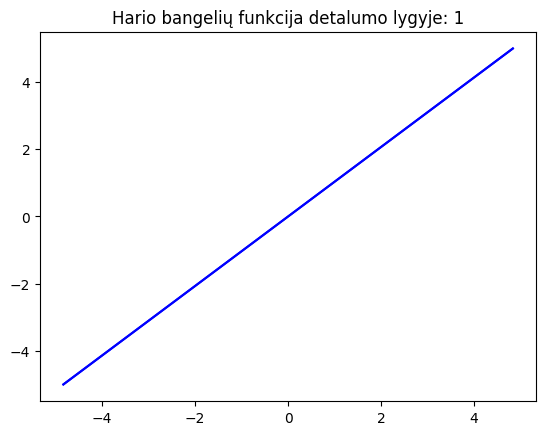

hx length:
1024
hx:
[ 6.06451789  6.06451789  6.06451789 ... -5.40035297 -5.40035297
 -5.40035297]
hy length:
1024
hy:
[11.79935041 11.79935041 11.79935041 ...  1.84408743  1.84408743
  1.84408743]


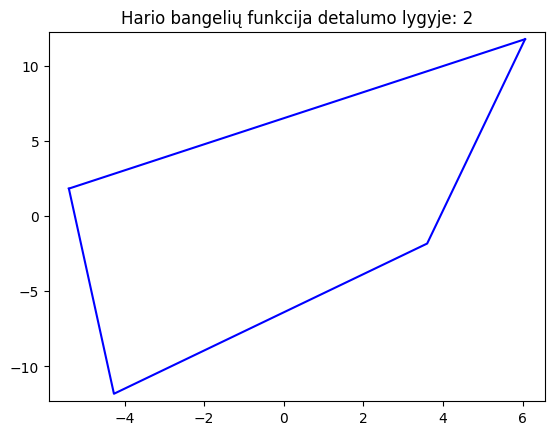

hx length:
1024
hx:
[ 2.78943348  2.78943348  2.78943348 ... -4.38341796 -4.38341796
 -4.38341796]
hy length:
1024
hy:
[13.80710739 13.80710739 13.80710739 ...  7.6582254   7.6582254
  7.6582254 ]


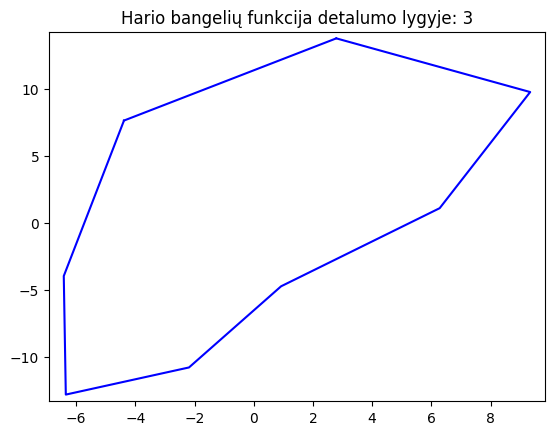

hx length:
1024
hx:
[-0.02158835 -0.02158835 -0.02158835 ... -3.67729919 -3.67729919
 -3.67729919]
hy length:
1024
hy:
[14.92423729 14.92423729 14.92423729 ... 10.70549461 10.70549461
 10.70549461]


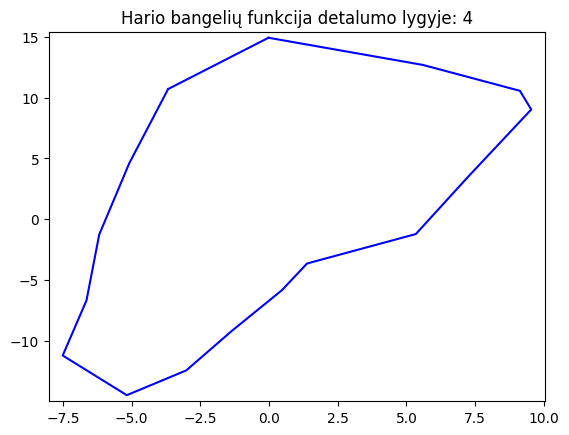

hx length:
1024
hx:
[-1.38242786 -1.38242786 -1.38242786 ... -3.15953943 -3.15953943
 -3.15953943]
hy length:
1024
hy:
[14.80877924 14.80877924 14.80877924 ... 12.22045836 12.22045836
 12.22045836]


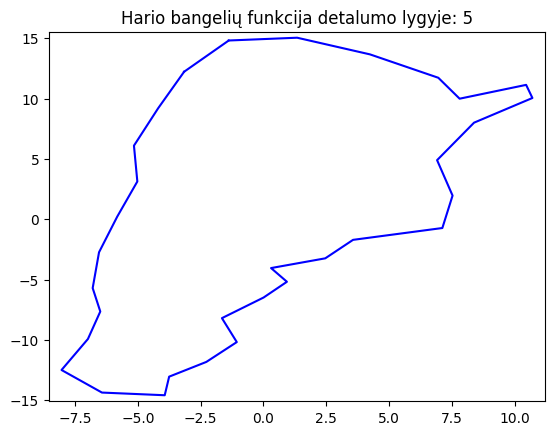

hx length:
1024
hx:
[-1.95676704 -1.95676704 -1.95676704 ... -2.9104302  -2.9104302
 -2.9104302 ]
hy length:
1024
hy:
[14.33951404 14.33951404 14.33951404 ... 12.95664011 12.95664011
 12.95664011]


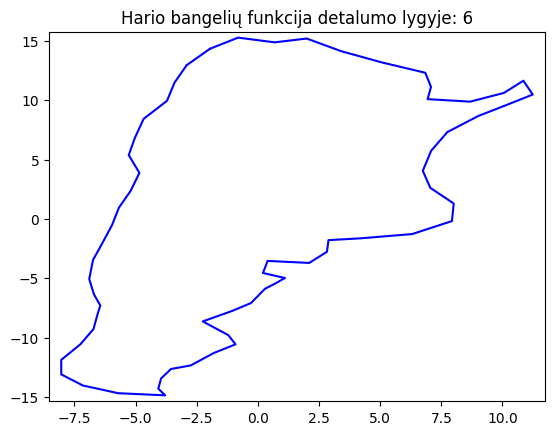

hx length:
1024
hx:
[-2.04779726 -2.04779726 -2.04779726 ... -2.51357019 -2.51357019
 -2.51357019]
hy length:
1024
hy:
[13.91850043 13.91850043 13.91850043 ... 13.21045934 13.21045934
 13.21045934]


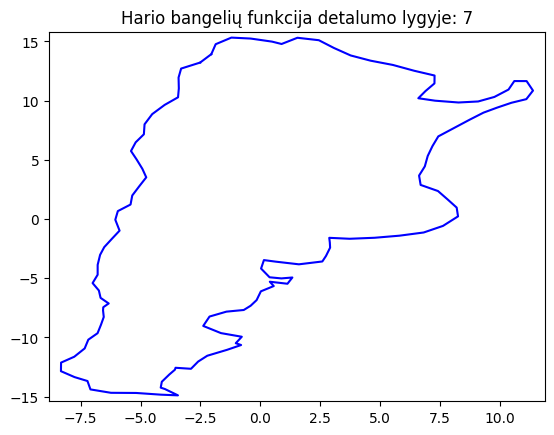

hx length:
1024
hx:
[-2.12407131 -2.12407131 -2.12407131 ... -2.28901404 -2.28901404
 -2.28901404]
hy length:
1024
hy:
[13.66936365 13.66936365 13.66936365 ... 13.32918777 13.32918777
 13.32918777]


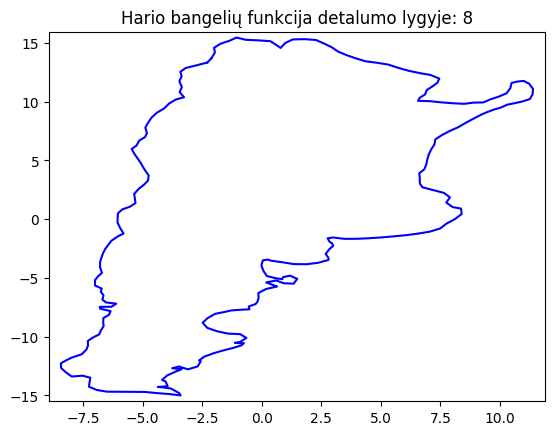

hx length:
1024
hx:
[-2.16545983 -2.16545983 -2.08268279 ... -2.37117306 -2.20685502
 -2.20685502]
hy length:
1024
hy:
[13.54415272 13.54415272 13.79457459 ... 13.23943156 13.41894399
 13.41894399]


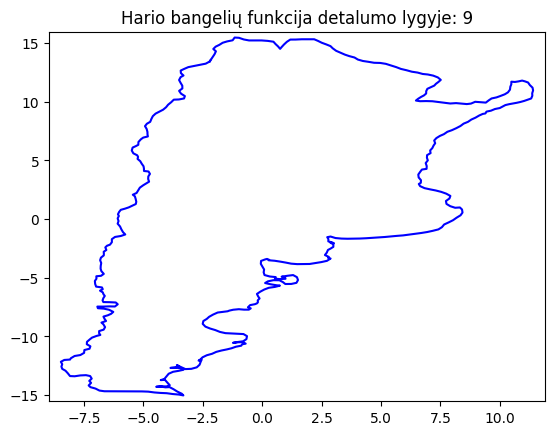

hx length:
1024
hx:
[-2.18616328 -2.14475638 -2.10337399 ... -2.30935638 -2.22754676
 -2.18616328]
hy length:
1024
hy:
[13.48155029 13.60675515 13.73196811 ... 13.26229764 13.35633769
 13.48155029]


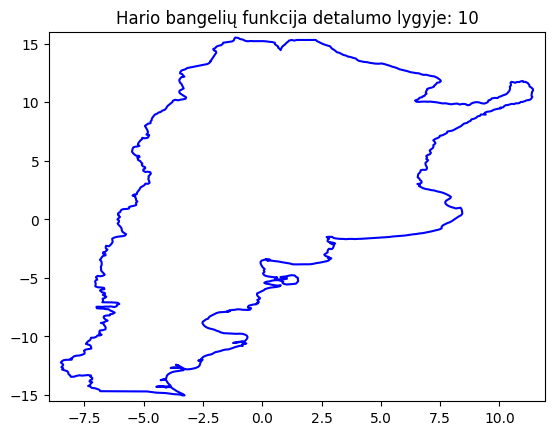

In [17]:
import matplotlib.pyplot as plt
import shapefile
import numpy as np
from shapely import geometry

# Haar Wavelet Reconstruction Function --------------------------------------------------------

def haar_wavelet_reconstruction(x, j, k, a, b):
    # Wavelet function
    eps = 1e-9
    xtld = (x - a) / (b - a)
    xx = np.power(2, j) * xtld - k
    h = np.power(2, j / 2) * (np.sign(xx + eps) + np.sign(xx - 1 - eps) - 2 * np.sign(xx - 0.5)) / (2 * (b - a))
    return h

# Haar Pyramid Algorithm ----------------------------------------------------------------------

def haar_pyramid_algorithm(value_array, nl, a, b):
    details = []
    smooth = (b - a) * value_array * 2 ** (-nl / 2)
    
    for i in range(nl):
        smooth_temp = (smooth[::2] + smooth[1::2]) / np.sqrt(2)
        details.append((smooth[::2] - smooth[1::2]) / np.sqrt(2))
        smooth = smooth_temp
    
    return smooth, details

# Read Initial Points ------------------------------------------------------------------------

shape = shapefile.Reader("./ne_10m_admin_0_countries.shp")

id = -1
for i in range(len(shape)):
    feature = shape.shapeRecords()[i]
    if feature.record.NAME_EN == "Argentina":
        id = i
        break

if id == -1:
    print("No such country")
else:
    print("id: " + str(id))

feature = shape.shapeRecords()[id]
print(feature.record.NAME_EN)

largest_area_id = 0
if feature.shape.__geo_interface__['type'] == 'MultiPolygon':
    print(len(feature.shape.__geo_interface__['coordinates']))
    area = 0
    for i in range(len(feature.shape.__geo_interface__['coordinates'])):
        points = feature.shape.__geo_interface__['coordinates'][i][0]
        polygon = geometry.Polygon(points)
        if polygon.area > area:
            area = polygon.area
            largest_area_id = i

    xxyy = feature.shape.__geo_interface__['coordinates'][largest_area_id][0]
else:
    xxyy = feature.shape.__geo_interface__['coordinates'][0]

# Plot Initial Graph ------------------------------------------------------------------------

xy = list(zip(*xxyy))
X = xy[0]
Y = xy[1]
print("Initial Data Graph")
print(f"Number of points read: {len(X)}")

plt.title("Pradinis Argentinos grafikas")
plt.plot(X, Y, 'b')
plt.show()

# Haar Wavelet Approximation -----------------------------------------------------------------

# Level at which Haar wavelet approximation will occur
NL = 10

starter_point_count = len(X)
interpolated_points_count = 2 ** NL

# Parameterize points
t = np.zeros(starter_point_count)
for i in range(1, starter_point_count):
    diff = np.array([X[i] - X[i - 1], Y[i] - Y[i - 1]])
    t[i] = t[i - 1] + np.linalg.norm(diff)

print(t)

# Calculate Haar wavelet ranges
min_t = min(t)
max_t = max(t)
print(f"Haar Wavelet Ranges: [{min_t} - {max_t}]")

# Interpolate new X, Y values to have 2^NL points
t1 = np.linspace(min_t, max_t, interpolated_points_count)
interpolated_X = np.interp(t1, t, X)
interpolated_Y = np.interp(t1, t, Y)

# Change parameterization to interpolated values
t = t1

plt.plot(interpolated_X, interpolated_Y)
plt.title("Nauji interpoliuoti taškai")
plt.show()

# Decompose into coarsest scale (j = 0) and gather all details
smooth_X, details_X = haar_pyramid_algorithm(interpolated_X, NL, min_t, max_t)
smooth_Y, details_Y = haar_pyramid_algorithm(interpolated_Y, NL, min_t, max_t)

# Define visualization points
hx = np.zeros(interpolated_points_count)
hy = np.zeros(interpolated_points_count)

# Reconstruct the graph from details and coarsest level
for i in range(NL):
    h1x, h1y = np.zeros(interpolated_points_count), np.zeros(interpolated_points_count)
    for k in range(2 ** i):
        h1x += details_X[NL - i - 1][k] * haar_wavelet_reconstruction(t, i, k, min_t, max_t)
        h1y += details_Y[NL - i - 1][k] * haar_wavelet_reconstruction(t, i, k, min_t, max_t)
    
    hx += h1x
    hy += h1y

    plt.title(f'Hario bangelių funkcija detalumo lygyje: {i + 1}')
    plt.plot(hx, hy, color="blue")
    plt.plot([hx[0], hx[-1]], [hy[0], hy[-1]], color="blue")
    print(f"hx length:\n{len(hx)}")
    print(f"hx:\n{hx}")
    print(f"hy length:\n{len(hy)}")
    print(f"hy:\n{hy}")
    plt.ylim(min(hy) - 0.5, max(hy) + 0.5)
    plt.xlim(min(hx) - 0.5, max(hx) + 0.5)
    plt.show()
